In [144]:
import pandas as pd
import numpy as np
df=pd.read_excel("heart_disease.xlsx",sheet_name="Heart_disease")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [145]:
df.shape

(908, 13)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [147]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [148]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

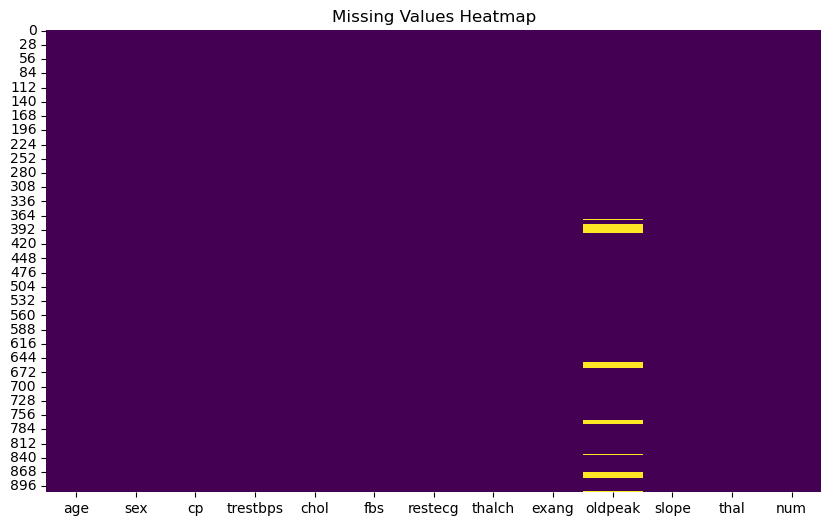

In [149]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [150]:
d1=df["oldpeak"].median()
df['oldpeak'].fillna(value=d1,inplace=True)



C:\Users\RITHIKA\AppData\Local\Temp\ipykernel_27528\1983407018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna(value=d1,inplace=True)


In [151]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [152]:
df.isnull().sum().sum()

0

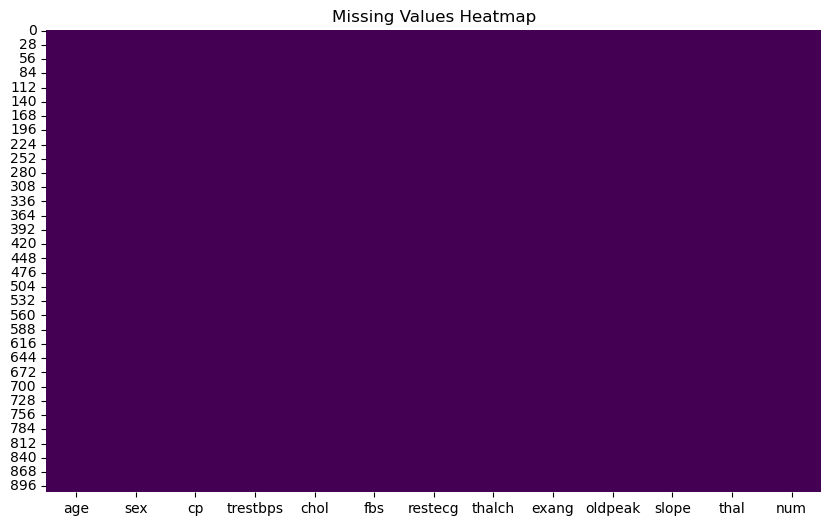

In [153]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


In [154]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.864537,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.060433,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [155]:
numeric_col=df.select_dtypes(include=['float64','int64']).columns
numeric_col

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

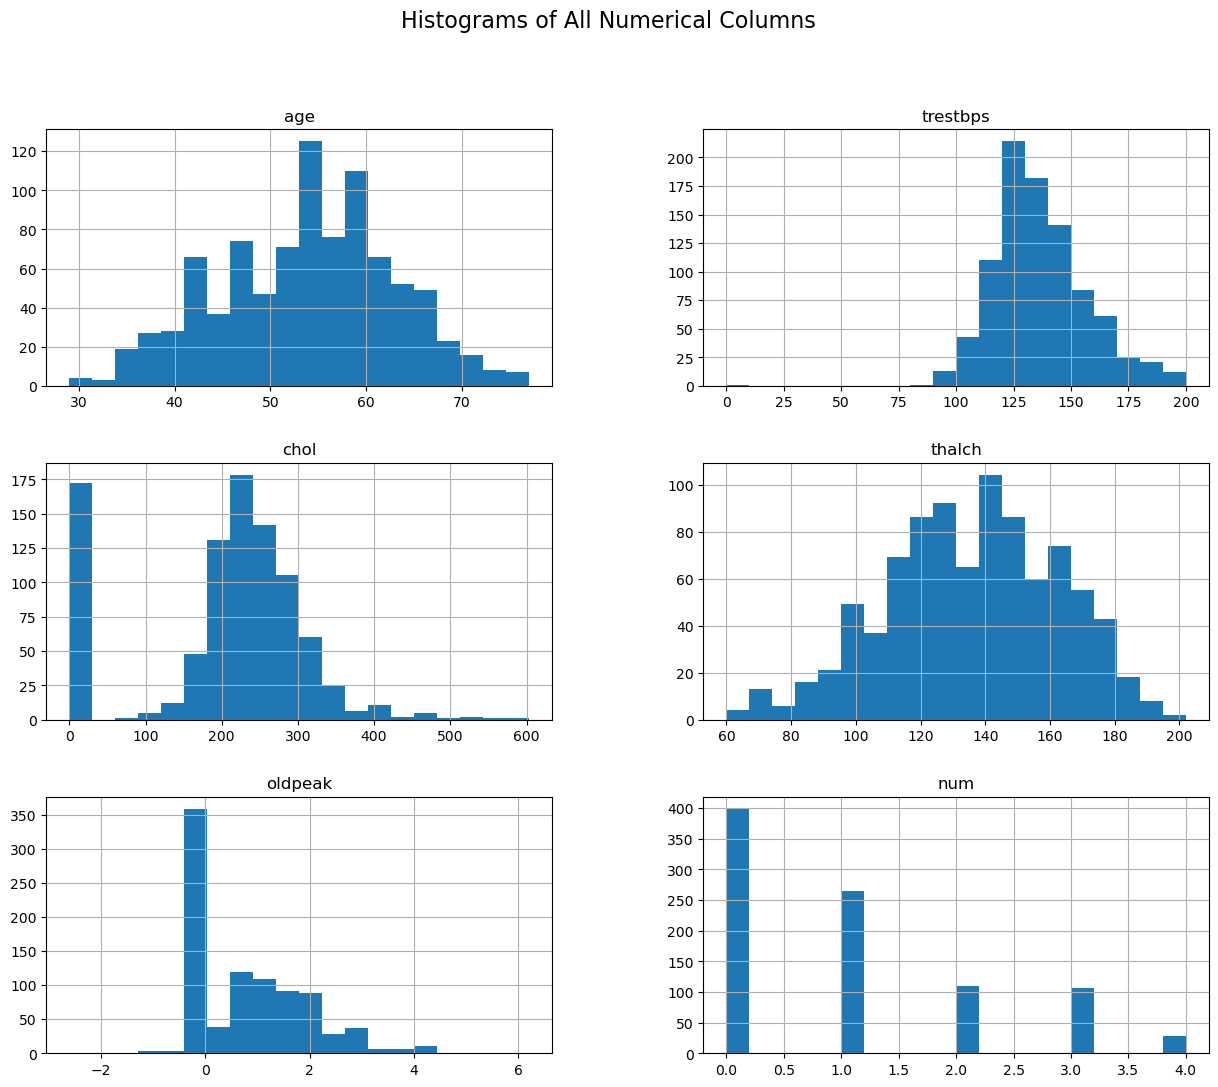

In [156]:
import matplotlib.pyplot as plt

df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']].hist(figsize=(15, 12), bins=20)
plt.suptitle("Histograms of All Numerical Columns", fontsize=16)
plt.show()

In [1]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']])
plt.xticks(rotation=90)
plt.title("Boxplot of All Numerical Columns")
plt.show()


NameError: name 'sns' is not defined

<Figure size 1500x800 with 0 Axes>

In [ ]:
for col in numeric_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Keep only values inside the range
    df = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)]
   
print("Outliers removed successfully.")


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']])
plt.xticks(rotation=90)
plt.title("Boxplot of All Numerical Columns")
plt.show()


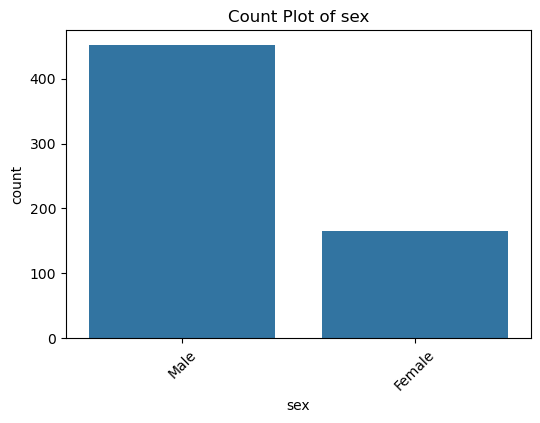

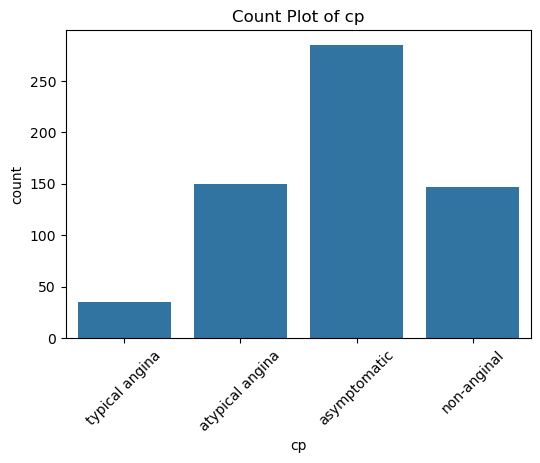

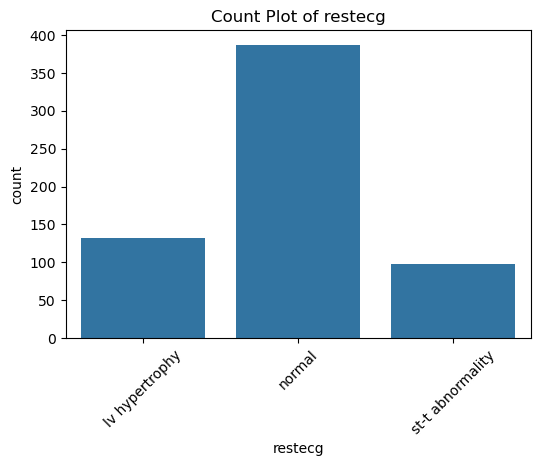

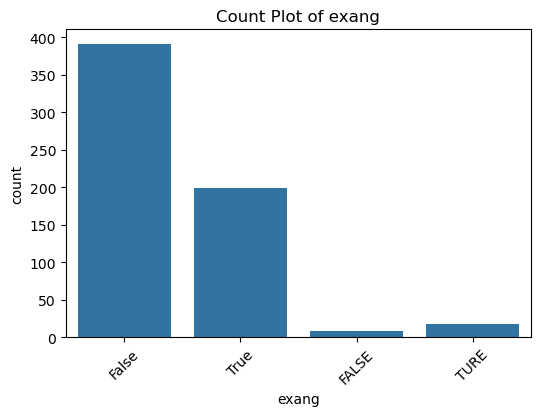

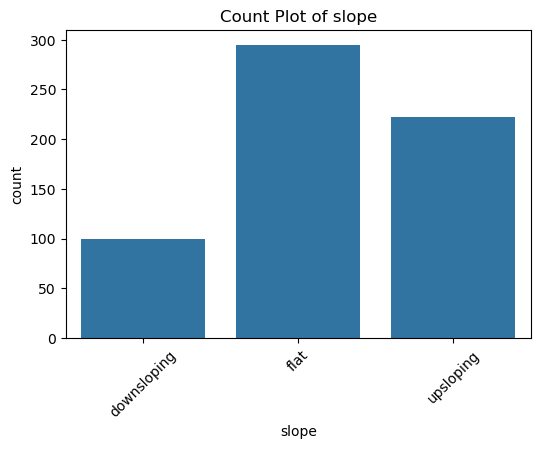

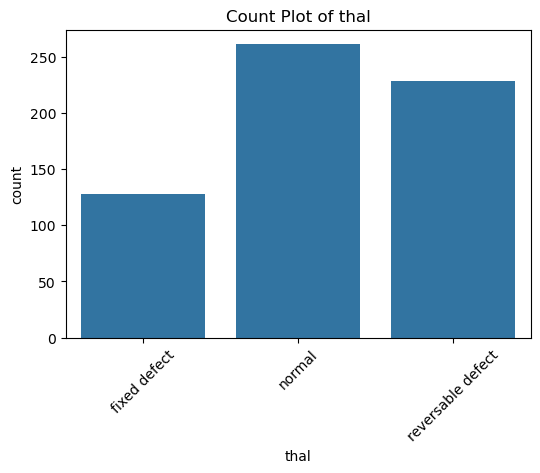

In [160]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
# Plot countplots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


In [161]:
df_countable = df[['age', 'trestbps', 'chol', 'thalch', 'oldpeak']]
df_countable.head()

,age,trestbps,chol,thalch,oldpeak
0,63,145,233,150,2.3
1,41,135,203,132,0.0
2,57,140,192,148,0.4
3,52,118,186,190,0.0
4,57,110,201,126,1.5


In [162]:
# standardization SCALING 
from sklearn .preprocessing import StandardScaler 
SS = StandardScaler()
SS_X = SS.fit_transform(df_countable)
SS_X = pd.DataFrame(SS_X)
SS_X.columns = list(df_countable)
SS_X

,age,trestbps,chol,thalch,oldpeak
0,1.204410,0.739977,-0.196233,0.358773,1.742252
1,-1.281323,0.166258,-0.782180,-0.358515,-0.811647
2,0.526483,0.453117,-0.997027,0.279075,-0.367491
3,-0.038456,-0.809065,-1.114216,1.952748,-0.811647
4,0.526483,-1.268040,-0.821243,-0.597611,0.853939
...,...,...,...,...,...
612,2.221301,1.600555,-0.586864,-0.438214,0.853939
613,0.639471,1.026836,-0.469675,-0.916406,-0.811647
614,0.639471,1.026836,-0.469675,-0.916406,-0.811647
615,0.639471,1.485811,-0.215765,-0.119419,-0.256452


In [163]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['sex', 'cp', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [164]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
  print(f"\nColumn: {col}")
  print(df[col].unique())


Column: sex
['Male' 'Female']

Column: cp
['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

Column: restecg
['lv hypertrophy' 'normal' 'st-t abnormality']

Column: exang
[False True 'FALSE' 'TURE']

Column: slope
['downsloping' 'flat' 'upsloping']

Column: thal
['fixed defect' 'normal' 'reversable defect']


In [165]:
df_cat = df[['sex','cp','restecg','slope','thal']]
df_cat

,sex,cp,restecg,slope,thal
0,Male,typical angina,lv hypertrophy,downsloping,fixed defect
1,Male,atypical angina,normal,flat,fixed defect
2,Male,asymptomatic,normal,flat,fixed defect
3,Male,typical angina,lv hypertrophy,flat,fixed defect
4,Male,asymptomatic,normal,flat,fixed defect
...,...,...,...,...,...
762,Male,asymptomatic,lv hypertrophy,upsloping,fixed defect
764,Male,non-anginal,st-t abnormality,downsloping,fixed defect
765,Male,non-anginal,st-t abnormality,downsloping,fixed defect
767,Male,non-anginal,st-t abnormality,downsloping,normal


In [1]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df_LE = df_cat.apply(LE.fit_transform)
df_LE.head()

NameError: name 'df_cat' is not defined

In [167]:
# Replace 'bool_column_name' with your actual column name
exang =df['exang'] = (
    df['exang']
    .astype(str)
    .str.upper()
    .str.strip()
    .replace({'TRUE': 1, 'TURE': 1, 'FALSE': 0, 'False':0})
    .fillna(0)
    .astype(int)
)
exang


C:\Users\RITHIKA\AppData\Local\Temp\ipykernel_27528\536981787.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'TRUE': 1, 'TURE': 1, 'FALSE': 0, 'False':0})


0      0
1      0
2      0
3      0
4      1
      ..
762    0
764    1
765    1
767    1
772    1
Name: exang, Length: 617, dtype: int32

In [168]:
num=df['num']
num

0      0
1      0
2      0
3      0
4      0
      ..
762    2
764    2
765    2
767    2
772    2
Name: num, Length: 617, dtype: int64

In [169]:
df_final = pd.concat([SS_X,df_LE,exang,df['num']],axis=1)
df_final

,age,trestbps,chol,thalch,oldpeak,sex,cp,restecg,slope,thal,exang,num
0,1.204410,0.739977,-0.196233,0.358773,1.742252,1.0,3.0,0.0,0.0,0.0,0.0,0.0
1,-1.281323,0.166258,-0.782180,-0.358515,-0.811647,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.526483,0.453117,-0.997027,0.279075,-0.367491,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,-0.038456,-0.809065,-1.114216,1.952748,-0.811647,1.0,3.0,0.0,1.0,0.0,0.0,0.0
4,0.526483,-1.268040,-0.821243,-0.597611,0.853939,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
762,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,2.0,0.0,0.0,2.0
764,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,0.0,0.0,1.0,2.0
765,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,0.0,0.0,1.0,2.0
767,NaN,NaN,NaN,NaN,NaN,1.0,2.0,2.0,0.0,1.0,1.0,2.0


In [170]:
df_final = df_final.fillna(0)
df_final

,age,trestbps,chol,thalch,oldpeak,sex,cp,restecg,slope,thal,exang,num
0,1.204410,0.739977,-0.196233,0.358773,1.742252,1.0,3.0,0.0,0.0,0.0,0.0,0.0
1,-1.281323,0.166258,-0.782180,-0.358515,-0.811647,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.526483,0.453117,-0.997027,0.279075,-0.367491,1.0,0.0,1.0,1.0,0.0,0.0,0.0
3,-0.038456,-0.809065,-1.114216,1.952748,-0.811647,1.0,3.0,0.0,1.0,0.0,0.0,0.0
4,0.526483,-1.268040,-0.821243,-0.597611,0.853939,1.0,0.0,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
762,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,2.0,0.0,0.0,2.0
764,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.0,2.0,0.0,0.0,1.0,2.0
765,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.0,2.0,0.0,0.0,1.0,2.0
767,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2.0,2.0,0.0,1.0,1.0,2.0


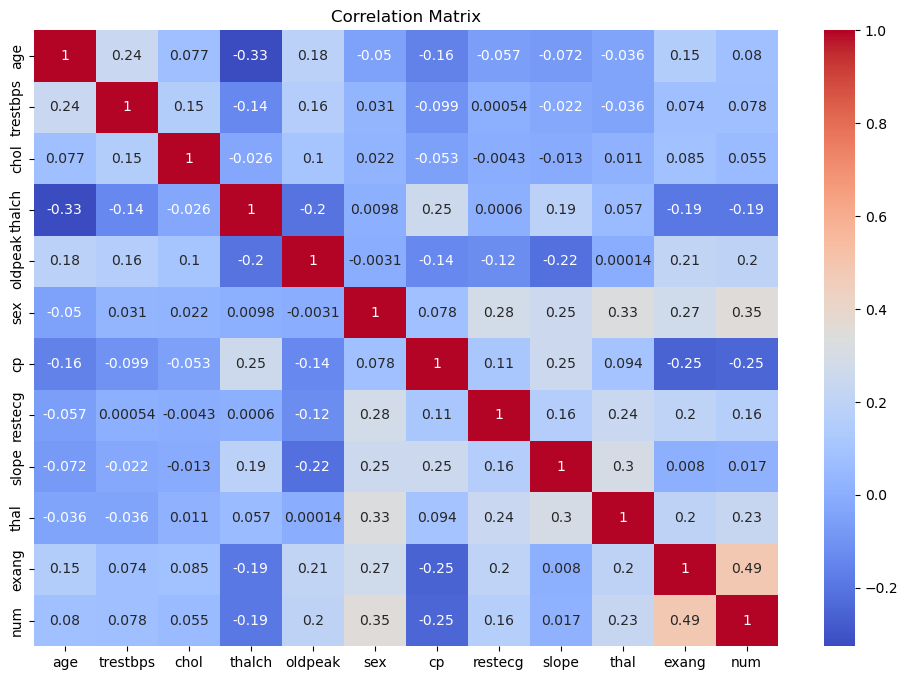

In [171]:
plt.figure(figsize=(12,8))
sns.heatmap(df_final.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [172]:
X = df_final.drop("num", axis=1)   # features
y = df_final["num"]                # target
# Convert multi-class target to binary
y = y.apply(lambda x: 1 if x > 0 else 0)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_tuned = DecisionTreeClassifier(
    max_depth=4,
    min_samples_split=10,
    criterion="gini",
    random_state=42
)

dt_tuned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, min_samples_split=10, random_state=42)

In [173]:

y_pred = dt_tuned.predict(X_test)
y_prob = dt_tuned.predict_proba(X_test)[:,1]
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report
)

print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1 Score :", f1_score(y_test, y_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_prob))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy : 0.8541666666666666
Precision: 0.8409090909090909
Recall   : 0.7254901960784313
F1 Score : 0.7789473684210526
ROC-AUC  : 0.915559772296015

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        93
           1       0.84      0.73      0.78        51

    accuracy                           0.85       144
   macro avg       0.85      0.83      0.84       144
weighted avg       0.85      0.85      0.85       144



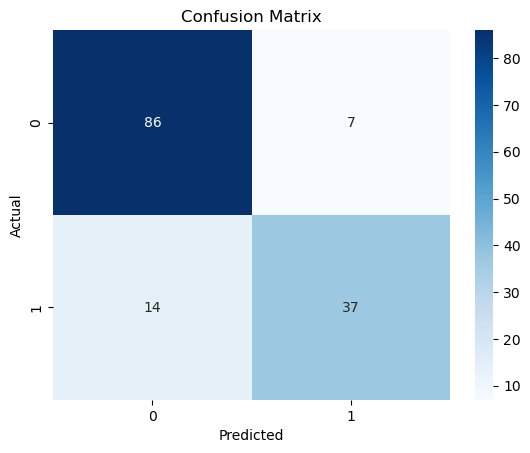

In [174]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


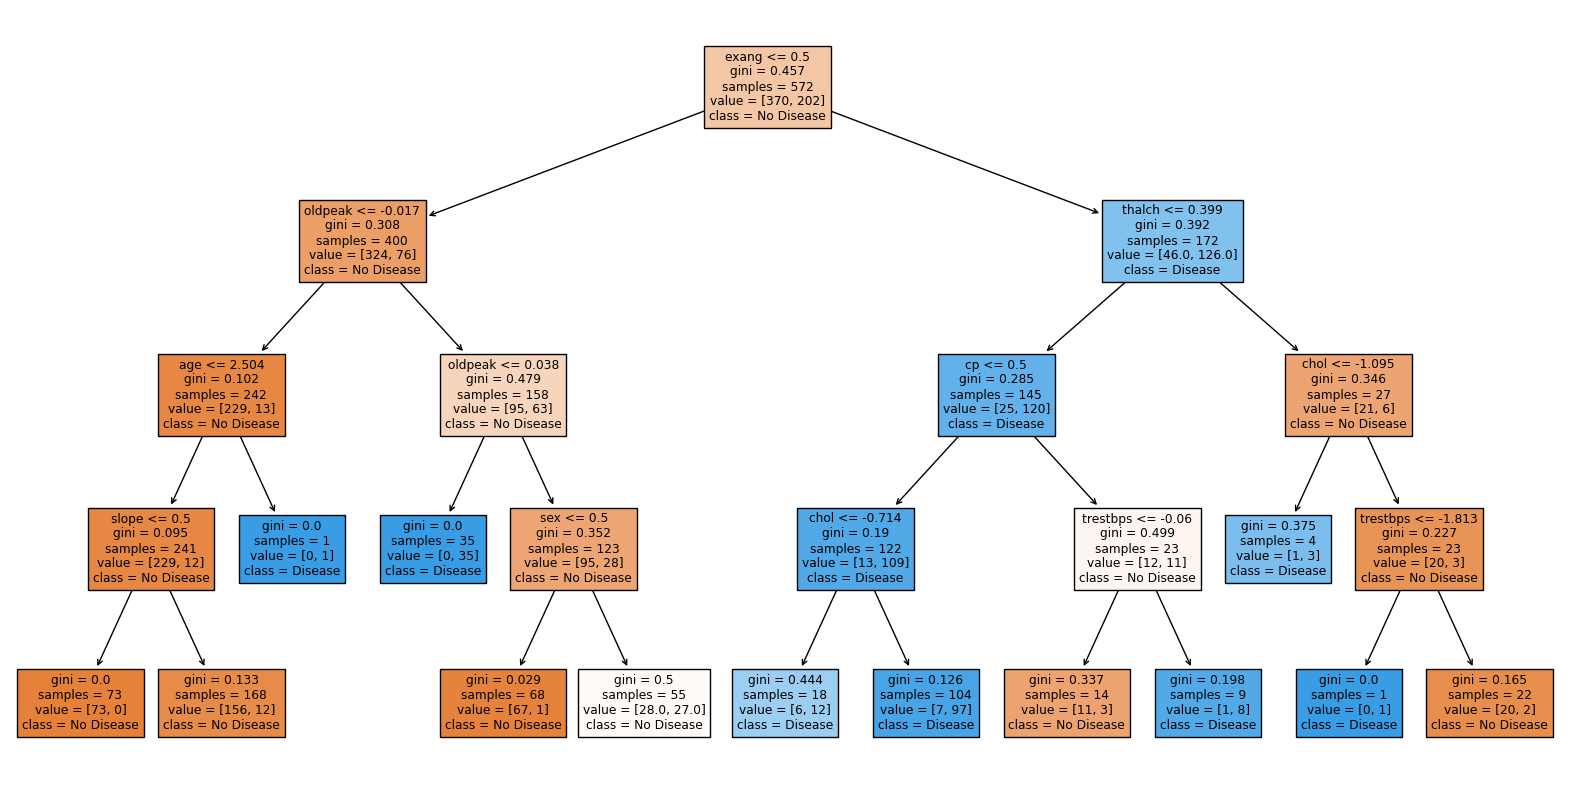

In [175]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    dt_tuned,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True
)
plt.show()



In [176]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_tuned.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance


,Feature,Importance
10,exang,0.400312
4,oldpeak,0.312414
3,thalch,0.094308
5,sex,0.077959
6,cp,0.037715
1,trestbps,0.037125
2,chol,0.027065
0,age,0.010166
8,slope,0.002935
7,restecg,0.000000
